In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import random
import os


In [2]:
random.seed(42)
np.random.seed(42)

In [3]:
out_dir = 'output'
os.makedirs(out_dir, exist_ok=True)

In [4]:
adata = sc.read_h5ad('../xenium_outs/adata_Xen.h5ad')

In [5]:
adata.obs['Disease'].value_counts()

Disease
ANCA     1573032
SLE       798228
GBM       462735
Cntrl     384215
Name: count, dtype: int64

## Cntrl Vs ANCA : Overall

/home/zsultana/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


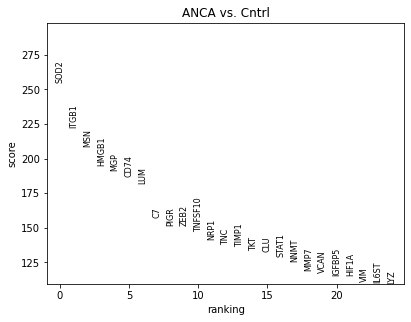

In [6]:
sc.tl.rank_genes_groups(adata, 'Disease', groups=['ANCA'], reference='Cntrl', method='wilcoxon', pts=True)
sc.pl.rank_genes_groups(adata, groups=['ANCA'], n_genes=25)

In [7]:
Diff_Genes_ANCA = sc.get.rank_genes_groups_df(adata, group="ANCA")
Diff_Genes_ANCA.to_csv(os.path.join(out_dir,"Diff_Genes_ANCA_XENIUM.csv"),index=False)

/home/zsultana/.local/lib/python3.9/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


## Cntrl Vs ANCA : PECs

In [8]:
adata.obs["celltype_l1_Disease"]= adata.obs['celltype_l1'].astype(str) + "_" + adata.obs['Disease'].astype(str)

/home/zsultana/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


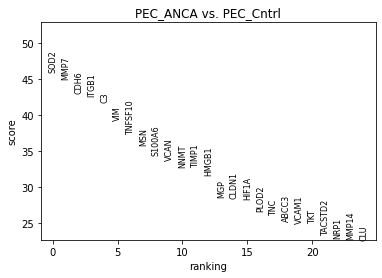

In [10]:
sc.tl.rank_genes_groups(adata, 'celltype_l1_Disease', groups=['PEC_ANCA'], reference='PEC_Cntrl', method='wilcoxon',use_raw=False, 
                       pts=True,logfc=True)
sc.pl.rank_genes_groups(adata, groups=['PEC_ANCA'], n_genes=25)

In [11]:
Diff_Genes_PEC_ANCA = sc.get.rank_genes_groups_df(adata, group="PEC_ANCA")
Diff_Genes_PEC_ANCA.to_csv(os.path.join(out_dir,"Diff_Genes_PEC_ANCA_XENIUM.csv"),index=False)

/home/zsultana/.local/lib/python3.9/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


## Other Method by subsetting PECs first

In [12]:
adata_PEC = adata[adata.obs['celltype_l1'] == 'PEC',:]

In [13]:
adata_PEC.obs['Disease'].value_counts()

Disease
ANCA     32039
SLE      14809
GBM      13408
Cntrl     8564
Name: count, dtype: int64

/home/zsultana/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/zsultana/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


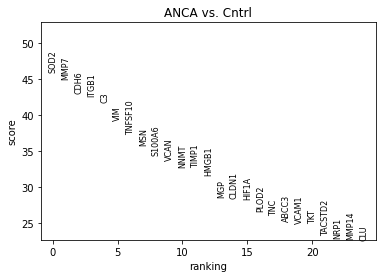

In [14]:
sc.tl.rank_genes_groups(adata_PEC, 'Disease', groups=['ANCA'], reference='Cntrl', method='wilcoxon', use_raw=False, key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata_PEC, n_genes=25, sharey=False, key="wilcoxon")

/home/zsultana/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


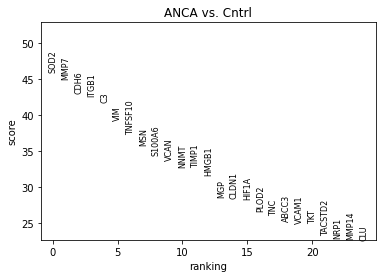

In [15]:
sc.tl.rank_genes_groups(adata_PEC, 'Disease', groups=['ANCA'], reference='Cntrl', method='wilcoxon',use_raw=False, pts=True)
sc.pl.rank_genes_groups(adata_PEC, groups=['ANCA'], n_genes=25)

In [16]:
Diff_Genes_PEC_ANCA_v2 = sc.get.rank_genes_groups_df(adata_PEC, group="ANCA")
Diff_Genes_PEC_ANCA_v2.to_csv(os.path.join(out_dir,"Diff_Genes_PEC_ANCA_XENIUM_v2.csv"),index=False)

/home/zsultana/.local/lib/python3.9/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


In [17]:
Diff_Genes_PEC_ANCA_v2

,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group
0,SOD2,45.883694,1.668608,0.000000e+00,0.000000e+00,0.498330
1,MMP7,44.963333,2.766880,0.000000e+00,0.000000e+00,0.377665
2,CDH6,43.020828,2.143564,0.000000e+00,0.000000e+00,0.393427
3,ITGB1,42.574253,1.471328,0.000000e+00,0.000000e+00,0.479978
4,C3,41.738075,2.653726,0.000000e+00,0.000000e+00,0.357283
...,...,...,...,...,...,...
475,DNM1,-16.353052,-1.316027,4.137258e-60,4.843619e-59,0.290146
476,VEGFA,-17.550550,-2.013750,5.890706e-69,8.078682e-68,0.117263
477,ATF3,-20.563377,-4.290607,5.842125e-94,9.669724e-93,0.022317
478,NR4A1,-29.537409,-5.148027,9.530163e-192,3.049652e-190,0.019289
